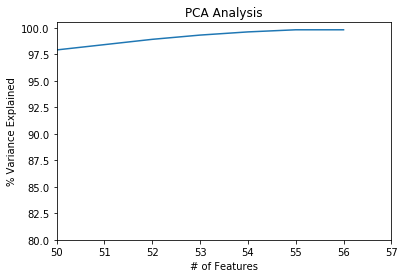

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  




def read_data():
    data = pd.read_csv("dataset.txt", delimiter=',')
    features = data.iloc[:, :57].values
    target = data.iloc[:, 57:].values
    # normalize the data
    features = StandardScaler().fit_transform(features)
    return features, target

features, target = read_data()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

pca = PCA(n_components=57, svd_solver='full')
pca.fit(x_train)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(80,100.5)
plt.xlim(50, 57)
plt.style.context('seaborn-whitegrid')


plt.plot(var) 

# PCA Analysis
As you can see here in the PCA Analysis plot, it can be shown that 54 features will cover all of the variance.

In [9]:
print("Case 1")
classifier = KNeighborsClassifier(n_jobs=-1,n_neighbors=5,weights='uniform')  
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Case 1
[[1290   95]
 [ 145  770]]
             precision    recall  f1-score   support

          0       0.90      0.93      0.91      1385
          1       0.89      0.84      0.87       915

avg / total       0.90      0.90      0.90      2300



/Users/erenatas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Feature extraction: Use PCA to reduce dimensionality to m, followed by k-NN. Try for different values of
# m corresponding to proportion of variance of 0.80, 0.81, 0.82, ...., 0.99. Plot the data for m=2.
print("Case 2")
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

pca = PCA(n_components=57).fit(x_train)
X_reduce = pca.transform(x_train)

classifier = KNeighborsClassifier(n_jobs=-1,n_neighbors=5,weights='uniform')  
classifier.fit(X_reduce, y_train) 

preds = classifier.predict(x_test)
print(confusion_matrix(y_test, preds))  
print(classification_report(y_test, preds)) 


Case 2


/Users/erenatas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[[1062  313]
 [ 719  206]]
             precision    recall  f1-score   support

          0       0.60      0.77      0.67      1375
          1       0.40      0.22      0.29       925

avg / total       0.52      0.55      0.52      2300

